In [1]:
import pandas as pd
from row_filter import phone_error_calc as pec
from row_filter import *

In [2]:
df_dgps1 = pd.read_csv("row_data/elite/diffGPS/baseline_log_20180422-104956.csv") #16N #issue
df_dgps2 = pd.read_csv("row_data/elite/diffGPS/baseline_log_20180422-104427.csv") #16S
df_dgps3 = pd.read_csv("row_data/elite/diffGPS/baseline_log_20180422-105906.csv") #20N
df_dgps4 = pd.read_csv("row_data/elite/diffGPS/baseline_log_20180422-105358.csv") #20S
df_dgps5 = pd.read_csv("row_data/elite/diffGPS/baseline_log_20180422-110625.csv") #24N #issue
df_dgps6 = pd.read_csv("row_data/elite/diffGPS/baseline_log_20180422-110303.csv") #24S
df_dgps7 = pd.read_csv("row_data/elite/diffGPS/baseline_log_20180422-111307.csv") #28N
df_dgps8 = pd.read_csv("row_data/elite/diffGPS/baseline_log_20180422-110951.csv") #28S
df_dgps9 = pd.read_csv("row_data/elite/diffGPS/baseline_log_20180422-111703.csv") #34S #issue

df_dgps1.pc_time = ["2018-04-22 10:" + item for item in df_dgps1.pc_time]
df_dgps1.gps_time = ["2018-04-22 17:" + item for item in df_dgps1.gps_time]
df_dgps5.pc_time = ["2018-04-22 11:" + item for item in df_dgps5.pc_time]
df_dgps5.gps_time = ["2018-04-22 18:" + item for item in df_dgps5.gps_time]
df_dgps9.pc_time = ["2018-04-22 11:" + item for item in df_dgps9.pc_time]
df_dgps9.gps_time = ["2018-04-22 18:" + item for item in df_dgps9.gps_time]

# #club-level Scull DGPS
df2_dgps1 = pd.read_csv("row_data/club-level/diffGPS/log1_baseline_log_20180420-090601.csv") #20N
df2_dgps2 = pd.read_csv("row_data/club-level/diffGPS/log4_baseline_log_20180420-091604.csv") #22N
df2_dgps3 = pd.read_csv("row_data/club-level/diffGPS/log2_baseline_log_20180420-091022.csv") #22S   #issue
df2_dgps4 = pd.read_csv("row_data/club-level/diffGPS/log8_baseline_log_20180420-092443.csv") #24N
df2_dgps5 = pd.read_csv("row_data/club-level/diffGPS/log6_baseline_log_20180420-092004.csv") #24S
df2_dgps6 = pd.read_csv("row_data/club-level/diffGPS/log12_baseline_log_20180420-093324.csv") #26N
df2_dgps7 = pd.read_csv("row_data/club-level/diffGPS/log10_baseline_log_20180420-092925.csv") #26S

df2_dgps3.pc_time = ["2018-04-20 09:" + item for item in df2_dgps3.pc_time]
df2_dgps3.gps_time = ["2018-04-20 16:" + item for item in df2_dgps3.gps_time]

In [3]:
df_phone = pd.read_csv("row_data/elite/iPhone/Boat-20180422T103229_1641_rpc364_data_1CLX_1_B_2CDF0487-83FC-45CC-B590-FF42D74E0D6D.csv")
df2_phone = pd.read_csv("row_data/club-level/iPhone/Boat2x-20180420T085713_1633_rpc364_data_1CLX_1_B_F92041BC-2503-4150-8196-2B45C0258ED8.csv")

In [4]:
df_error1 = pec.error_xy(df_phone, df_dgps1, 16, 1, 'Elite')
df_error2 = pec.error_xy(df_phone, df_dgps2, 16, 2, 'Elite')
df_error3 = pec.error_xy(df_phone, df_dgps3, 20, 3, 'Elite')
df_error4 = pec.error_xy(df_phone, df_dgps4, 20, 4, 'Elite')
df_error5 = pec.error_xy(df_phone, df_dgps5, 24, 5, 'Elite')
df_error6 = pec.error_xy(df_phone, df_dgps6, 24, 6, 'Elite')
df_error7 = pec.error_xy(df_phone, df_dgps7, 28, 7, 'Elite')
df_error8 = pec.error_xy(df_phone, df_dgps8, 28, 8, 'Elite')
df_error9 = pec.error_xy(df_phone, df_dgps9, 34, 9, 'Elite')

In [5]:
df2_error1 = pec.error_xy(df2_phone, df2_dgps1, 20, 10, 'Club-level')
df2_error2 = pec.error_xy(df2_phone, df2_dgps2, 22, 11, 'Club-level')
df2_error3 = pec.error_xy(df2_phone, df2_dgps3, 22, 12, 'Club-level')
df2_error4 = pec.error_xy(df2_phone, df2_dgps4, 24, 13, 'Club-level')
df2_error5 = pec.error_xy(df2_phone, df2_dgps5, 24, 14, 'Club-level')
df2_error6 = pec.error_xy(df2_phone, df2_dgps6, 26, 15, 'Club-level')
df2_error7 = pec.error_xy(df2_phone, df2_dgps7, 26, 16, 'Club-level')

In [6]:
frames = [df_error1, df_error2, df_error3, df_error4, df_error5, df_error6, df_error7,
         df_error8, df_error9, df2_error1, df2_error2, df2_error3, df2_error4, df2_error5,
         df2_error6, df2_error7]
df_error = pd.concat(frames, ignore_index=True, sort=True)

In [7]:
print(np.cov(df_error.dist_error))

25.279780872302382


In [8]:
print(np.cov(df_error.speed_error))

0.309111103750163


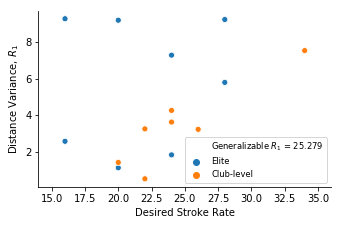

In [9]:
df_var = df_error.groupby(['trial', 'rower']).var()
df_var.reset_index(inplace=True)
df_var['desired_SR'] = df_error.groupby(['trial']).mean()
fig, ax = plt.subplots()
fig.set_size_inches(5.25,3.24)
sns.scatterplot(x='desired_SR', y='dist_error', hue='rower', data=df_var)
ax.set(xlabel='Desired Stroke Rate', ylabel='Distance Variance, $R_1$')
ax.set_xlim((14, 36))
handles, labels = ax.get_legend_handles_labels()
labels[0] = 'Generalizable $R_1$ = 25.279'
ax.legend(handles=handles[:], labels=labels[:], fontsize='small')
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
fig.savefig('row_data/figures/R1.png', dpi=300)

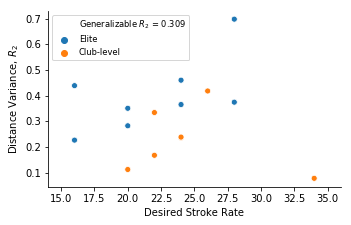

In [10]:
df_var = df_error.groupby(['trial', 'rower']).var()
df_var.reset_index(inplace=True)
df_var['desired_SR'] = df_error.groupby(['trial']).mean()
fig, ax = plt.subplots()
fig.set_size_inches(5.25,3.24)
sns.scatterplot(x='desired_SR', y='speed_error', hue='rower', data=df_var)
ax.set(xlabel='Desired Stroke Rate', ylabel='Distance Variance, $R_2$')
ax.set_xlim((14, 36))
handles, labels = ax.get_legend_handles_labels()
labels[0] = 'Generalizable $R_2$ = 0.309'
ax.legend(handles=handles[:], labels=labels[:], fontsize='small')
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
fig.savefig('row_data/figures/R2.png', dpi=300)